In [28]:
# page43

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv('train.csv', encoding='latin-1')
print('cust_df shape =', cust_df.shape)
print(cust_df.head(3))

cust_df shape = (76020, 371)
   ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  imp_op_var40_ult1  \
0                      0.0                      0.0                0.0   
1                      0.0                      0.0                0.0   
2                      0.0                      0.0                0.0   

   imp_op_var41_comer_ult1  imp_op_var41_comer_ult3  imp_op_var41_efect_ult1  \
0   

In [29]:
# page44

print(cust_df.info())
print()
print(cust_df.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB
None

0


In [30]:
# page46

print("target values count=\n", cust_df['TARGET'].value_counts())
print()
unsatisfied_cnt = cust_df[cust_df['TARGET']==1]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()
print('unsatisfied rate {:.2f}%'.format(unsatisfied_cnt/total_cnt*100))

target values count=
 TARGET
0    73012
1     3008
Name: count, dtype: int64

unsatisfied rate 3.96%


In [31]:
# page47

pd.set_option('display.max_columns', 80)
print(cust_df.describe())

                  ID           var3         var15  imp_ent_var16_ult1  \
count   76020.000000   76020.000000  76020.000000        76020.000000   
mean    75964.050723   -1523.199277     33.212865           86.208265   
std     43781.947379   39033.462364     12.956486         1614.757313   
min         1.000000 -999999.000000      5.000000            0.000000   
25%     38104.750000       2.000000     23.000000            0.000000   
50%     76043.000000       2.000000     28.000000            0.000000   
75%    113748.750000       2.000000     40.000000            0.000000   
max    151838.000000     238.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             76020.000000             76020.000000   
mean                 72.363067               119.529632   
std                 339.315831               546.266294   
min                   0.000000                 0.000000   
25%                   0.000000                 

In [23]:
# page48

print("var3 =\n", cust_df['var3'].value_counts(ascending=False).head(10))

var3 =
 var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: count, dtype: int64


In [35]:
# page49

cust_df['var3'].replace(-999999, 2, inplace=True)
print("var3 =\n", cust_df['var3'].value_counts(ascending=False).head(10))
cust_df = cust_df.drop(['ID'], axis=1)

X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('feature shape {}'.format(X_features.shape))

var3 =
 var3
2     74281
8       138
9       110
3       108
1       105
13       98
7        97
4        86
12       85
6        82
Name: count, dtype: int64
feature shape (76020, 369)


/tmp/ipython-input-35-3027195014.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cust_df['var3'].replace(-999999, 2, inplace=True)


In [38]:
# page50

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print("train set:{}, test set:{}".format(X_train.shape, X_test.shape))
print("label for train rate:\n", y_train.value_counts()/train_cnt)
print("label for test rate:\n", y_test.value_counts()/test_cnt)

train set:(60816, 369), test set:(15204, 369)
label for train rate:
 TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64
label for test rate:
 TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


In [41]:
# page51

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, random_state=156, early_stopping_rounds=100, eval_metric='auc')

xgb_clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_auc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC_AUC score:{:.4f}'.format(xgb_auc_score))

[0]	validation_0-auc:0.83789	validation_1-auc:0.82554
[1]	validation_0-auc:0.84273	validation_1-auc:0.82878
[2]	validation_0-auc:0.84901	validation_1-auc:0.83359
[3]	validation_0-auc:0.85530	validation_1-auc:0.83767
[4]	validation_0-auc:0.85891	validation_1-auc:0.83909
[5]	validation_0-auc:0.86117	validation_1-auc:0.84156
[6]	validation_0-auc:0.86378	validation_1-auc:0.84138
[7]	validation_0-auc:0.86737	validation_1-auc:0.84048
[8]	validation_0-auc:0.87021	validation_1-auc:0.84162
[9]	validation_0-auc:0.87258	validation_1-auc:0.84100
[10]	validation_0-auc:0.87505	validation_1-auc:0.84117
[11]	validation_0-auc:0.87747	validation_1-auc:0.84111
[12]	validation_0-auc:0.87872	validation_1-auc:0.84114
[13]	validation_0-auc:0.88087	validation_1-auc:0.84066
[14]	validation_0-auc:0.88208	validation_1-auc:0.84014
[15]	validation_0-auc:0.88340	validation_1-auc:0.83965
[16]	validation_0-auc:0.88557	validation_1-auc:0.83950
[17]	validation_0-auc:0.88664	validation_1-auc:0.84013
[18]	validation_0-au

In [49]:
# page52

from sklearn.model_selection import GridSearchCV

xgb_clf2 = XGBClassifier(n_estimators=100, early_stopping_rounds=30, eval_metric='auc')

params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}

gridcv = GridSearchCV(xgb_clf2, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV best parameter:', gridcv.best_params_)

xgb_auc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC_AUC score:{:.4f}'.format(xgb_auc_score))

[0]	validation_0-auc:0.80705	validation_1-auc:0.80366
[1]	validation_0-auc:0.80607	validation_1-auc:0.80683
[2]	validation_0-auc:0.79962	validation_1-auc:0.80156
[3]	validation_0-auc:0.80463	validation_1-auc:0.80839
[4]	validation_0-auc:0.82994	validation_1-auc:0.82595
[5]	validation_0-auc:0.84026	validation_1-auc:0.83143
[6]	validation_0-auc:0.84642	validation_1-auc:0.83616
[7]	validation_0-auc:0.84635	validation_1-auc:0.83399
[8]	validation_0-auc:0.85018	validation_1-auc:0.83592
[9]	validation_0-auc:0.85084	validation_1-auc:0.83463
[10]	validation_0-auc:0.85227	validation_1-auc:0.83362
[11]	validation_0-auc:0.85527	validation_1-auc:0.83695
[12]	validation_0-auc:0.85693	validation_1-auc:0.83944
[13]	validation_0-auc:0.85857	validation_1-auc:0.83941
[14]	validation_0-auc:0.85898	validation_1-auc:0.83988
[15]	validation_0-auc:0.85928	validation_1-auc:0.83954
[16]	validation_0-auc:0.86102	validation_1-auc:0.83887
[17]	validation_0-auc:0.86239	validation_1-auc:0.83818
[18]	validation_0-au

In [45]:
# page54

xgb_clf3 = XGBClassifier(n_estimators=1000, colsample_bytree=0.75, max_depth=5, min_child_weight=1, learning_rate=0.02, reg_alpha=0.03, random_state=152, early_stopping_rounds=200, eval_metric='auc')
xgb_clf3.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_auc_score = roc_auc_score(y_test, xgb_clf3.predict_proba(X_test)[:,1], average='macro')
print('ROC_AUC score:{:.4f}'.format(xgb_auc_score))

[0]	validation_0-auc:0.75884	validation_1-auc:0.75937
[1]	validation_0-auc:0.82503	validation_1-auc:0.82005
[2]	validation_0-auc:0.83131	validation_1-auc:0.82583
[3]	validation_0-auc:0.82715	validation_1-auc:0.82266
[4]	validation_0-auc:0.83172	validation_1-auc:0.82553
[5]	validation_0-auc:0.82682	validation_1-auc:0.82312
[6]	validation_0-auc:0.82469	validation_1-auc:0.82056
[7]	validation_0-auc:0.82220	validation_1-auc:0.81851
[8]	validation_0-auc:0.82598	validation_1-auc:0.82150
[9]	validation_0-auc:0.83007	validation_1-auc:0.82635
[10]	validation_0-auc:0.82910	validation_1-auc:0.82424
[11]	validation_0-auc:0.83092	validation_1-auc:0.82708
[12]	validation_0-auc:0.83316	validation_1-auc:0.83015
[13]	validation_0-auc:0.83618	validation_1-auc:0.83304
[14]	validation_0-auc:0.83707	validation_1-auc:0.83402
[15]	validation_0-auc:0.83900	validation_1-auc:0.83419
[16]	validation_0-auc:0.84012	validation_1-auc:0.83521
[17]	validation_0-auc:0.84042	validation_1-auc:0.83531
[18]	validation_0-au

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

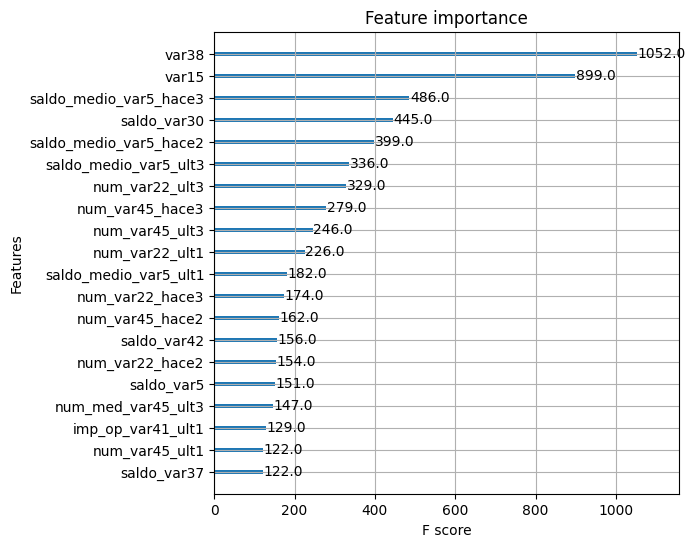

In [47]:
# page55

from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(figsize=(6,6))
plot_importance(xgb_clf3, max_num_features=20, ax=ax)